In [71]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
import pandas as pd
import numpy as np

In [77]:
%matplotlib inline
plt.style.use('seaborn')

In [4]:
preprocess_url = "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3"
encoder_url = "https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4"

In [5]:
bert_preprocess_model = hub.KerasLayer(preprocess_url)

In [6]:
text_test = ['nice movie indeed','I love python programming']
text_preprocessed = bert_preprocess_model(text_test)
text_preprocessed.keys()

dict_keys(['input_mask', 'input_word_ids', 'input_type_ids'])

In [7]:
text_preprocessed['input_mask']

<tf.Tensor: shape=(2, 128), dtype=int32, numpy=
array([[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
      dtype=int32)>

nice movie indeed 
1, 1, 1, 1, 1
CLS nice movie indeed SEP

I love python programming
1, 1, 1, 1, 1, 1
CLS I love python programming SEP

In [10]:
text_preprocessed['input_word_ids']
# CLS nice movie indeed SEP
# 101,  3835,  3185,  5262,   102

# CLS I love python programming SEP
# 101,  1045,  2293, 18750,  4730,   102

<tf.Tensor: shape=(2, 128), dtype=int32, numpy=
array([[  101,  3835,  3185,  5262,   102,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0, 

In [11]:
bert_model = hub.KerasLayer(encoder_url)
bert_results = bert_model(text_preprocessed)
bert_results.keys()

dict_keys(['sequence_output', 'pooled_output', 'default', 'encoder_outputs'])

https://www.tensorflow.org/text/tutorials/classify_text_with_bert

In [12]:
# embedding of the entire sentence

bert_results['pooled_output']

<tf.Tensor: shape=(2, 768), dtype=float32, numpy=
array([[-0.7917741 , -0.2141193 ,  0.49769488, ...,  0.24465191,
        -0.47334486,  0.81758696],
       [-0.91712314, -0.4793519 , -0.78656995, ..., -0.6175179 ,
        -0.7102687 ,  0.921843  ]], dtype=float32)>

In [13]:
# each input token in the context

bert_results['sequence_output']
# nice movie indeed 0 0 0 0 0 <-- 128

<tf.Tensor: shape=(2, 128, 768), dtype=float32, numpy=
array([[[ 0.0729203 ,  0.08567806,  0.14476833, ..., -0.09677095,
          0.08722141,  0.07711083],
        [ 0.1783942 , -0.19006135,  0.50349474, ..., -0.05869776,
          0.32717073, -0.15578511],
        [ 0.18701458, -0.43388766, -0.48875168, ..., -0.1550283 ,
          0.00145148, -0.24470986],
        ...,
        [ 0.12083128,  0.12884232,  0.46453533, ...,  0.07375553,
          0.17441972,  0.1652206 ],
        [ 0.07967931, -0.01190672,  0.50225437, ...,  0.13777766,
          0.21002245,  0.00624563],
        [-0.07212669, -0.2830347 ,  0.5903337 , ...,  0.47551915,
          0.16668504, -0.08920358]],

       [[-0.07900602,  0.36335096, -0.21101578, ..., -0.17183776,
          0.1629977 ,  0.672427  ],
        [ 0.27883476,  0.43716255, -0.35764766, ..., -0.04463655,
          0.38315225,  0.58879846],
        [ 1.2037675 ,  1.0727019 ,  0.48408765, ...,  0.2492101 ,
          0.407309  ,  0.40481824],
        ...,

In [16]:
bert_results['encoder_outputs'][-1]
# shape 2: 2 sentences, statemnet has 128 words including the pairing, each word has 768 size of embedding vector

<tf.Tensor: shape=(2, 128, 768), dtype=float32, numpy=
array([[[ 0.0729203 ,  0.08567806,  0.14476833, ..., -0.09677095,
          0.08722141,  0.07711083],
        [ 0.1783942 , -0.19006135,  0.50349474, ..., -0.05869776,
          0.32717073, -0.15578511],
        [ 0.18701458, -0.43388766, -0.48875168, ..., -0.1550283 ,
          0.00145148, -0.24470986],
        ...,
        [ 0.12083128,  0.12884232,  0.46453533, ...,  0.07375553,
          0.17441972,  0.1652206 ],
        [ 0.07967931, -0.01190672,  0.50225437, ...,  0.13777766,
          0.21002245,  0.00624563],
        [-0.07212669, -0.2830347 ,  0.5903337 , ...,  0.47551915,
          0.16668504, -0.08920358]],

       [[-0.07900602,  0.36335096, -0.21101578, ..., -0.17183776,
          0.1629977 ,  0.672427  ],
        [ 0.27883476,  0.43716255, -0.35764766, ..., -0.04463655,
          0.38315225,  0.58879846],
        [ 1.2037675 ,  1.0727019 ,  0.48408765, ...,  0.2492101 ,
          0.407309  ,  0.40481824],
        ...,

In [18]:
df = pd.read_csv('spam.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [23]:
df.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [25]:
df.Category.value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

In [26]:
747/4825

0.15481865284974095

In [39]:
df_spam = df[df.Category == 'spam']
df_spam.shape

(747, 2)

In [43]:
df_ham_downsampled = df[df.Category == 'ham']
df_ham_downsampled = df_ham_downsampled.sample(df_spam.shape[0])
df_ham_downsampled.shape

(747, 2)

In [44]:
df_balanced = pd.concat([df_ham_downsampled, df_spam], axis = 0)
df_balanced.shape

(1494, 2)

In [45]:
df_balanced.Category.value_counts()

ham     747
spam    747
Name: Category, dtype: int64

In [46]:
df_balanced['spam'] = df_balanced['Category'].apply(lambda x: 1 if x == 'spam' else 0)
df_balanced.sample(10)

,Category,Message,spam
3941,ham,Does daddy have a bb now.,0
4779,ham,U R THE MOST BEAUTIFUL GIRL IVE EVER SEEN. U R...,0
2514,spam,U have won a nokia 6230 plus a free digital ca...,1
1805,ham,The bus leaves at &lt;#&gt;,0
3529,spam,You are a £1000 winner or Guaranteed Caller Pr...,1
824,spam,25p 4 alfie Moon's Children in need song on ur...,1
3374,ham,Looks like you found something to do other tha...,0
697,ham,"Aight, you close by or still down around alex'...",0
789,spam,"5 Free Top Polyphonic Tones call 087018728737,...",1
4797,spam,URGENT This is our 2nd attempt to contact U. Y...,1


In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_balanced['Message'], df_balanced['spam'], stratify = df_balanced['spam'])

In [49]:
X_train.head()

5501    PRIVATE! Your 2003 Account Statement for 07808...
4652    A £400 XMAS REWARD IS WAITING FOR YOU! Our com...
1723    Thought praps you meant another one. Goodo! I'...
4586    U have a Secret Admirer who is looking 2 make ...
1469    Hi its LUCY Hubby at meetins all day Fri & I w...
Name: Message, dtype: object

In [50]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [51]:
def get_sentence_embedding(sentences):
    preprocessed_text = bert_preprocess(sentences)
    return bert_encoder(preprocessed_text)['pooled_output']
get_sentence_embedding([
    "500$ discount. hurry up", 
    "Bhavin, are you up for a volleybal game tomorrow?"
])

<tf.Tensor: shape=(2, 768), dtype=float32, numpy=
array([[-0.8435169 , -0.5132725 , -0.88845724, ..., -0.74748874,
        -0.7531473 ,  0.91964495],
       [-0.8720836 , -0.5054398 , -0.9444667 , ..., -0.8584752 ,
        -0.7174535 ,  0.8808299 ]], dtype=float32)>

In [54]:
e = get_sentence_embedding([
    "banana", 
    "grapes",
    "mango",
    "jeff bezos",
    "elon musk",
    "bill gates"
]
)

In [55]:
e

<tf.Tensor: shape=(6, 768), dtype=float32, numpy=
array([[-0.7606919 , -0.14219391,  0.49604574, ...,  0.42165303,
        -0.5322141 ,  0.80312175],
       [-0.86023235, -0.21242976,  0.49156845, ...,  0.39797997,
        -0.6050632 ,  0.8447167 ],
       [-0.7128862 , -0.15463905,  0.3840169 , ...,  0.35278746,
        -0.5099134 ,  0.734741  ],
       [-0.8253345 , -0.35550553, -0.5906968 , ..., -0.0161373 ,
        -0.6141755 ,  0.87230295],
       [-0.75041324, -0.2681262 , -0.2668968 , ...,  0.02839376,
        -0.5938099 ,  0.7974986 ],
       [-0.7854438 , -0.2994968 ,  0.41027415, ...,  0.52225393,
        -0.49573544,  0.815075  ]], dtype=float32)>

In [57]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_similarity([e[0]], [e[3]])

array([[0.84703857]], dtype=float32)

In [58]:
cosine_similarity([e[3]], [e[4]])

array([[0.98720354]], dtype=float32)

In [64]:
# BERT layer
text_input = tf.keras.layers.Input(shape = (), dtype = tf.string, name = 'text')
preprocessed_text = bert_preprocess(text_input)
output = bert_encoder(preprocessed_text)

# NN
l = tf.keras.layers.Dropout(0.1, name = 'dropout')(output['pooled_output'])
l = tf.keras.layers.Dense(1, activation = 'sigmoid', name = 'output')(l)

# construct final model
model = tf.keras.Model(inputs = [text_input], outputs = [l])

In [65]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer_2 (KerasLayer)     {'input_word_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_type_ids':                                                
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128)}                                                      

In [66]:
METRICS = [
    tf.keras.metrics.BinaryAccuracy(name = 'accuracy'),
    tf.keras.metrics.Precision(name = 'precision'),
    tf.keras.metrics.Recall(name = 'recall')
]

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = METRICS)

In [67]:
model.fit(X_train, y_train, epochs = 5)

Epoch 1/5
35/35 [==============================] - 556s 15s/step - loss: 0.6133 - accuracy: 0.6795 - precision: 0.6831 - recall: 0.6696
Epoch 2/5
35/35 [==============================] - 469s 13s/step - loss: 0.4986 - accuracy: 0.8304 - precision: 0.8179 - recall: 0.8500
Epoch 3/5
35/35 [==============================] - 457s 13s/step - loss: 0.4244 - accuracy: 0.8750 - precision: 0.8697 - recall: 0.8821
Epoch 4/5
35/35 [==============================] - 545s 16s/step - loss: 0.3943 - accuracy: 0.8696 - precision: 0.8581 - recall: 0.8857
Epoch 5/5
35/35 [==============================] - 459s 13s/step - loss: 0.3602 - accuracy: 0.8795 - precision: 0.8645 - recall: 0.9000


In [68]:
model.evaluate(X_test, y_test)

12/12 [==============================] - 159s 13s/step - loss: 0.3267 - accuracy: 0.9251 - precision: 0.9077 - recall: 0.9465


[0.3266961872577667,
 0.9251337051391602,
 0.9076923131942749,
 0.9465240836143494]

In [83]:
y_preds = model.predict(X_test)
y_preds = y_preds.flatten()

In [84]:
y_preds = np.where(y_preds>0.5, 1, 0)
y_preds

array([1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,

In [85]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test, y_preds)
cm

array([[169,  18],
       [ 10, 177]])

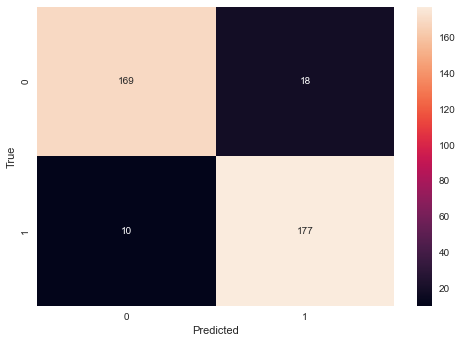

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('True');

In [87]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       187
           1       0.91      0.95      0.93       187

    accuracy                           0.93       374
   macro avg       0.93      0.93      0.93       374
weighted avg       0.93      0.93      0.93       374



In [88]:
reviews = [
    'Enter a chance to win $5000, hurry up, offer valid until march 31, 2021',
    'You are awarded a SiPix Digital Camera! call 09061221061 from landline. Delivery within 28days. T Cs Box177. M221BP. 2yr warranty. 150ppm. 16 . p pÂ£3.99',
    'it to 80488. Your 500 free text messages are valid until 31 December 2005.',
    'Hey Sam, Are you coming for a cricket game tomorrow',
    "Why don't you wait 'til at least wednesday to see if you get your ."
]
model.predict(reviews)
# larger than 0.5 is spam and otherwise

array([[0.66821194],
       [0.7350601 ],
       [0.6960169 ],
       [0.25851274],
       [0.20697245]], dtype=float32)